# Overview

Which charts should we choice in a ML project to show the result? In this article, we introduce one of ways to help us select the charts quickly. Here, we use iris dataset which is from Sklearn library. And also we will focus on the `sepal length` and `sepal width` attributes.


# EDA(Exploratory data analysis)

In [1]:
from sklearn.datasets import load_iris
import pandas as pd

data=load_iris()

df=pd.DataFrame(data=data.data, columns=data.feature_names)
df_t=pd.DataFrame(data=data.target, columns=['label'])

df_iris=pd.concat([df, df_t], axis=1)
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Scatter Plot

/tmp/ipykernel_27/3979745085.py:10: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.set_ylim(1.9,4,5)


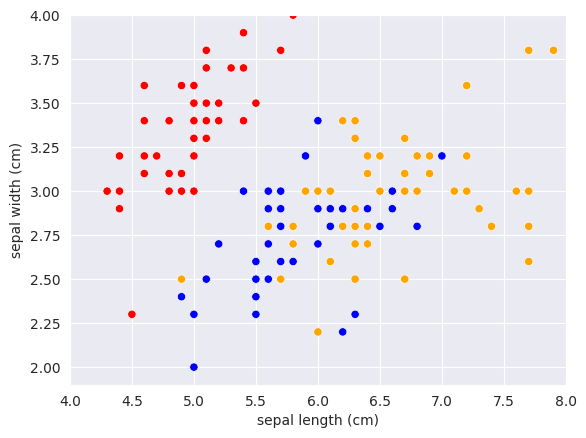

In [2]:
# Using a scatter plot to display the selected variables
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')
fig, ax=plt.subplots()
sns.scatterplot(data=df_iris, x='sepal length (cm)', y='sepal width (cm)', hue='label', palette=['red', 'blue','orange'], ax=ax)

ax.set_xlim(4,8)
ax.set_ylim(1.9,4,5)
plt.legend([],[], frameon=False)
plt.show()

# Classification

It is a supervised ML method that create a model using a training dataset to predict ot label a testing dataset. Simply put, if we want ot labelt he test data with discrete class labels, classification algorithms are the techniques that you are looking for.

There are various methods for classifying data. Here we will use **K-Nearest Neighbors(KNN)**, which uses closeness or similarities to classify data. Below, we will split the dataset, and then we apply KNN on training dataset to obtained model to be used to label the testing dataset. 

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(
    df_iris.iloc[:,0:2],
    df_iris['label'],
    test_size=0.15,
    random_state=36
)

from sklearn.neighbors import KNeighborsClassifier

neigh=KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
pred=neigh.predict(X_test)

# create a dataframe from the prediction results
y_pred=pd.DataFrame([i for i in pred])

# create another df adding a value to the prediction results for scatter plot
y_pred_sctter=pd.DataFrame([i+3 for i in pred])

#concat every df
df_X=pd.concat([X_train, X_test], ignore_index=True)
df_y_kde=pd.concat([y_train, y_pred], ignore_index=True).rename(columns={0:'kde'})
df_y_scat=pd.concat([y_train, y_pred_sctter], ignore_index=True).rename(columns={0:'scatter'})

df_class=pd.concat([df_X, df_y_kde, df_y_scat], axis=1)
df_class.head()

,sepal length (cm),sepal width (cm),kde,scatter
0,5.2,3.5,0,0
1,7.9,3.8,2,2
2,6.4,3.2,2,2
3,4.4,3.2,0,0
4,6.5,3.0,2,2


## KDE

Kernel Density Edtimation which is to show the data points' continuous probability density. This plot can help us visualiza data density after the classification.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

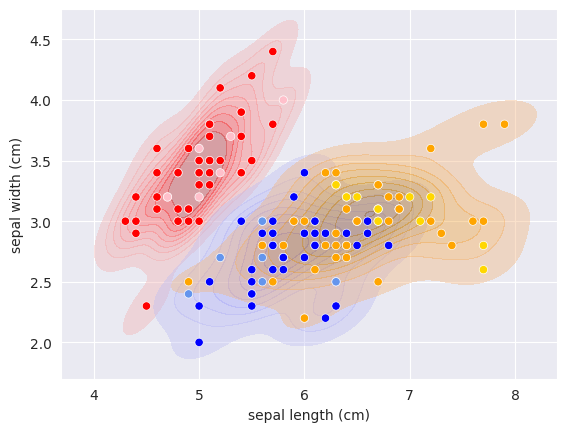

In [4]:
fig, ax=plt.subplots()

sns.kdeplot(data=df_class, x='sepal length (cm)', y='sepal width (cm)', fill=True, hue='kde', alpha=.4, palette=['red', 'blue', 'orange'], ax=ax)

sns.scatterplot(data=df_class, x='sepal length (cm)', y='sepal width (cm)', hue='scatter', palette=['red','blue','orange','pink','cornflowerblue','gold'], ax=ax)

ax.set_xlim(3.69,8.4)
ax.set_ylim(1.7, 4.75)
plt.legend([],[], frameon=False)
plt.show()

# Clustering

It is an unsupervised ML method that tries to identify similar groups within a dataset. If your data has no labels and you want to group them into discrete classes, clustering algorithms are techniques that you look for.

There are various algorithms to perform the clustering task. Among them, **K-means clustering** is a common method that is easy to use. Theoreticallty, K-means tries to partition data into K Clusters using the nearest mean from the cluster centroid.

In [5]:
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=3, random_state=0, n_init="auto").fit(df_iris.iloc[:,0:2])
df_iris['clus_label']=kmeans.labels_
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,clus_label
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


## KDE

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

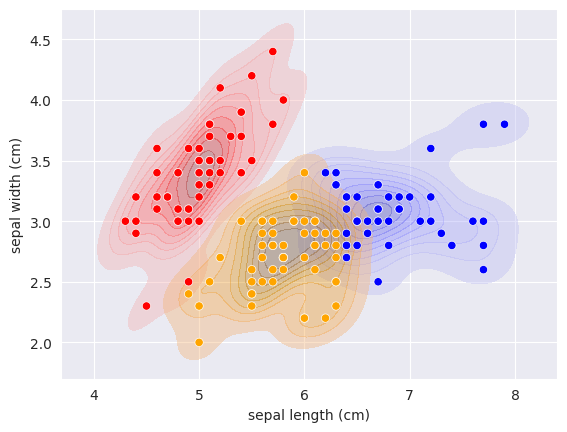

In [6]:
fig, ax=plt.subplots()

sns.kdeplot(data=df_iris, x='sepal length (cm)', y='sepal width (cm)', fill=True, hue='clus_label', alpha=.4, palette=['red', 'blue', 'orange'], ax=ax)

sns.scatterplot(data=df_iris, x='sepal length (cm)', y='sepal width (cm)', hue='clus_label', palette=['red','blue','orange'], ax=ax)

ax.set_xlim(3.69,8.4)
ax.set_ylim(1.7, 4.75)
plt.legend([],[], frameon=False)
plt.show()

# Regression

It is a supervised ML technique that can show a relationship beween dependent and independent variables. It can also be used to predict continuous values. Here, we are going to apply linear regression, which is a regression method that applies least squares to calculate the straight line that best fits the data.

In [7]:
from sklearn import linear_model

reg=linear_model.LinearRegression()
keep=[]

for i in [0,1,2]:
    df_s=df_iris[df_iris['label']==i]
    line_reg=reg.fit(df_s[['sepal length (cm)']], df_s[['sepal width (cm)']])
    y_pred=line_reg.predict(df_s[['sepal length (cm)']])
    df_s['line_reg']=y_pred
    keep.append(df_s)
df_reg=pd.concat(keep)
df_reg.head()

/tmp/ipykernel_27/697037567.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_s['line_reg']=y_pred
/tmp/ipykernel_27/697037567.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_s['line_reg']=y_pred
/tmp/ipykernel_27/697037567.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,clus_label,line_reg
0,5.1,3.5,1.4,0.2,0,0,3.503062
1,4.9,3.0,1.4,0.2,0,0,3.343356
2,4.7,3.2,1.3,0.2,0,0,3.183650
3,4.6,3.1,1.5,0.2,0,0,3.103798
4,5.0,3.6,1.4,0.2,0,0,3.423209


## EDA

Unlike the previous two, this one does not need to show the data density. The primary goal is to obtain the regression line.

**Note: The chart just displays the obtained result from the linear regression algorithm. To confirm that two variables actually have a linear relationship, we need to calcualte the Pearson correlation coefficient.**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

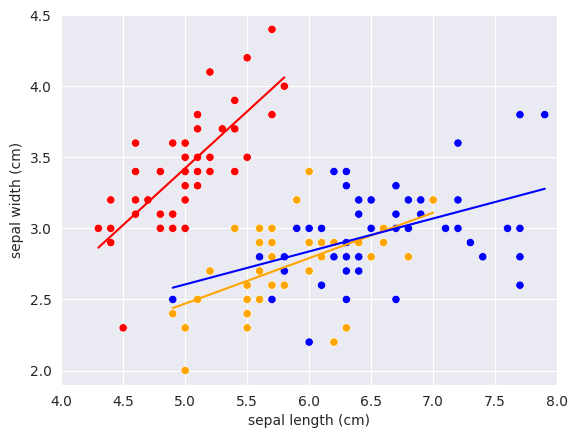

In [8]:
fig, ax = plt.subplots()
sns.scatterplot(data = df_iris, x = 'sepal length (cm)', y = 'sepal width (cm)',
                hue='label', palette=['red', 'orange', 'blue'], ax=ax)
sns.lineplot(data = df_reg, x = 'sepal length (cm)', y = 'line_reg',
             hue='label', palette=['red', 'orange', 'blue'], ax=ax)
ax.set_xlim(4,8)
ax.set_ylim(1.9,4.5)
plt.legend([],[], frameon=False)
plt.show()

# Dimensionality Reduction

It is used to cope with a dataset containing multiple continuous variables of features. It has the benefit of reducing complexity, improving algorithm performance, or helping plot data more easily. Thus if you want to decrease the number of features, dimensionality reduction algorithms can be techniques that you look for.

Our dataset iris contains only four continuous variables, it is hard to visualize these four attributes(features) at the same time. Thus, we need to reduce the number of features for plotting. So, here we use Principal Component Analysis(PCA) is dimensionality reduction methods that we are going to work with.

In [9]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
df_p=pca.fit_transform(df)
df_pca=pd.DataFrame(df_p)

df_dim=pd.concat([df_pca, df_t], axis=1)
df_dim.head()

,0,1,label
0,-2.684126,0.319397,0
1,-2.714142,-0.177001,0
2,-2.888991,-0.144949,0
3,-2.745343,-0.318299,0
4,-2.728717,0.326755,0


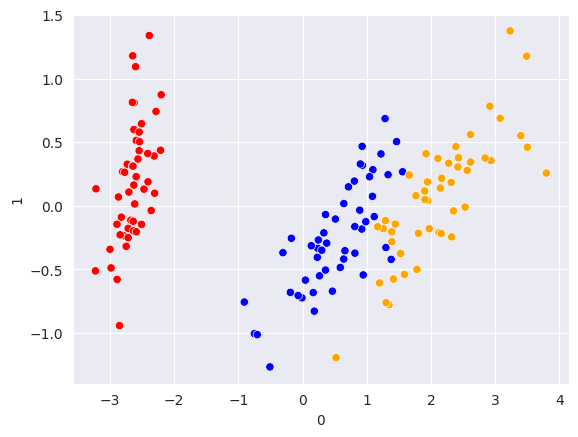

In [10]:
# we use scatter plot to display data points; location in the new dimensional space.
sns.scatterplot(data=df_dim, x=0, y=1, hue='label', palette=['red', 'blue', 'orange'])
plt.legend([],[], frameon=False)
plt.show()